<a href="https://colab.research.google.com/github/joaocassella/MVP_VisualizacaoDados/blob/main/MVP_VisualizacaoDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas

## Profs. Tatiana Escovedo e Hugo Villamizar

### Aluno : João Cassella



##1. Definição do Problema

O dataset utilizado foi extraído do banco de dados do Durabil que é uma plataforma de gestão de manutenção predial e de equipamentos. Este dataset é um subconjunto do banco de dados original e refere-se a parte das atividades executadas em um determinado hospital entre os meses de janeiro/2022 e fevereiro/2023. No dataset existem atividades de manutenç~çao realizadas em equipamento e também em elementos de sistemas prediais. O subconjunto foi extraído de forma aleatória e não representa integralmente as atividades de manutenção do referido hospital. O dataset contém 11 atributos descritos a seguir :


**Informações sobre os atributos:**
1. **sistema_id** - Código do sistema predial
2. **sistema** - Descrição do sistema predial
3. **tipo_equipamento_id** - Código do tipo do equipamento (preenchido apenas quando tratar-se de manutenção em equipamento)
4. **tipo_equipamento** - Descrição do tipo de equipamento(preenchido apenas quando tratar-se de manutenção em equipamento)
5. **dt_prevista** - Data prevista para a execução da atividade
6. **dt_realizada** - Data em que a atividade foi efetivamente executada
7. **tempo** - Quantidades de dias decorrido entre a data de previsão e a data de realização da atividade.
8. **executor_id** - Código da pessoa/empresa ou equipe que executou a atividade.
9. **executor** - Nome da pessoa/empresa ou equipe que executou a atividade.
10. **criticidade** - Código da criticidade da atividade(O sistema estabelece uma graduação de 1 a 4 para classificação das atividades, sendo 1 a criticidade mais alta)
11. **tipo** - Indica se a manutenção é PREVENTIVA, CORRETIVA ou é uma SOLICITAÇÃO(solicitação de serviços)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from sklearn.model_selection import train_test_split
from datetime import datetime




In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de Dados

Iremos usar o pacote Pandas (Python Data Analysis Library) para carregar de um arquivo .csv sem cabeçalho disponível online.

Com o dataset carregado, iremos explorá-lo um pouco.

In [3]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/joaocassella/MVP_VisualizacaoDados/main/Durabil.csv"

# Informa o cabeçalho das colunas
#colunas = ['sistema','tipo_equipamento_id','tipo_equipamento','criticidade','id','predio_id','predio_atividade_id','dt_prevista','dt_realizada','descricao','observacao','excluido','created','user_created','user_exclusao','user_execucao','token','prestador_id','horas_uso_prevista','horas_uso_realizada','executor','pai_id','user_alteracao','medicao','executa','predio_equipe_id','manual','acao','urgente','predio_ambiente_id','bloqueado','habilitado','tempo','tempo_parado','valor','obs_ocorrencia_id','tipo','sistema_id','elemento_id','equipamento_id','tabvalores_criticidade_id','convertida_atividade','criticidade_id','executor_token']

# Lê o arquivo utilizando as colunas informadas
#ds_durabil_inicial = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')
ds_inicial = pd.read_csv(url, delimiter=',')


In [4]:
ds_inicial.head()

,sistema_id,sistema,tipo_equipamento_id,tipo_equipamento,dt_prevista,dt_realizada,tempo,executor_id,executor,criticidade,tipo
0,664,CLIMATIZAÇÃO,22.0,AR CONDICIONADO SPLIT,2022-02-01,NaN,NaN,151.0,TOP AR,1.0,PREVENTIVA
1,664,CLIMATIZAÇÃO,22.0,AR CONDICIONADO SPLIT,2022-05-01,NaN,NaN,151.0,TOP AR,2.0,PREVENTIVA
2,664,CLIMATIZAÇÃO,22.0,AR CONDICIONADO SPLIT,2022-05-01,NaN,NaN,151.0,TOP AR,2.0,PREVENTIVA
3,664,CLIMATIZAÇÃO,22.0,AR CONDICIONADO SPLIT,2022-02-01,NaN,NaN,151.0,TOP AR,2.0,PREVENTIVA
4,664,CLIMATIZAÇÃO,22.0,AR CONDICIONADO SPLIT,2022-05-01,NaN,NaN,151.0,TOP AR,2.0,PREVENTIVA


## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [5]:
# Mostra as dimensões do dataset
print(ds_inicial.shape)

(20712, 11)


In [7]:
# Mostra as informações do dataset
print(ds_inicial.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20712 entries, 0 to 20711
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sistema_id           20712 non-null  int64  
 1   sistema              20712 non-null  object 
 2   tipo_equipamento_id  3165 non-null   float64
 3   tipo_equipamento     3165 non-null   object 
 4   dt_prevista          20712 non-null  object 
 5   dt_realizada         20222 non-null  object 
 6   tempo                20222 non-null  float64
 7   executor_id          20637 non-null  float64
 8   executor             20637 non-null  object 
 9   criticidade          20689 non-null  float64
 10  tipo                 20712 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 1.7+ MB
None


In [ ]:
# Observamos que os atributos sistema,tipo_equipamento, dt_prevista, dt_realizada, executor e tipo são do tipo object
# Faremos a conversão desses atributos para que possamos incluí-los nas análises
ds_inicial['sistema'] = ds_inicial['sistema'].astype('string');
ds_inicial['tipo_equipamento'] = ds_inicial['tipo_equipamento'].astype('string');
ds_inicial['dt_prevista'] = pd.to_datetime(ds_inicial['dt_prevista'])
ds_inicial['dt_realizada'] = pd.to_datetime(ds_inicial['dt_realizada'])
ds_inicial['executor'] = ds_inicial['executor'].astype('string');
ds_inicial['tipo'] = ds_inicial['tipo'].astype('string');



In [8]:
# Mostra as 10 primeiras linhas do dataset
ds_inicial.head(10)

,sistema_id,sistema,tipo_equipamento_id,tipo_equipamento,dt_prevista,dt_realizada,tempo,executor_id,executor,criticidade,tipo
0,664,CLIMATIZAÇÃO,22.0,AR CONDICIONADO SPLIT,2022-02-01,NaN,NaN,151.0,TOP AR,1.0,PREVENTIVA
1,664,CLIMATIZAÇÃO,22.0,AR CONDICIONADO SPLIT,2022-05-01,NaN,NaN,151.0,TOP AR,2.0,PREVENTIVA
2,664,CLIMATIZAÇÃO,22.0,AR CONDICIONADO SPLIT,2022-05-01,NaN,NaN,151.0,TOP AR,2.0,PREVENTIVA
3,664,CLIMATIZAÇÃO,22.0,AR CONDICIONADO SPLIT,2022-02-01,NaN,NaN,151.0,TOP AR,2.0,PREVENTIVA
4,664,CLIMATIZAÇÃO,22.0,AR CONDICIONADO SPLIT,2022-05-01,NaN,NaN,151.0,TOP AR,2.0,PREVENTIVA
5,664,CLIMATIZAÇÃO,22.0,AR CONDICIONADO SPLIT,2022-07-01,NaN,NaN,151.0,TOP AR,2.0,PREVENTIVA
6,664,CLIMATIZAÇÃO,22.0,AR CONDICIONADO SPLIT,2022-07-01,NaN,NaN,151.0,TOP AR,2.0,PREVENTIVA
7,664,CLIMATIZAÇÃO,22.0,AR CONDICIONADO SPLIT,2022-07-01,NaN,NaN,151.0,TOP AR,2.0,PREVENTIVA
8,664,CLIMATIZAÇÃO,22.0,AR CONDICIONADO SPLIT,2022-07-01,NaN,NaN,151.0,TOP AR,2.0,PREVENTIVA
9,664,CLIMATIZAÇÃO,22.0,AR CONDICIONADO SPLIT,2022-07-01,NaN,NaN,151.0,TOP AR,2.0,PREVENTIVA


In [9]:
# Mostra as 10 últimas linhas do dataset
ds_inicial.tail(10)

,sistema_id,sistema,tipo_equipamento_id,tipo_equipamento,dt_prevista,dt_realizada,tempo,executor_id,executor,criticidade,tipo
20702,658,COMBATE CONTRA INCÊNDIO E PÂNICO,NaN,NaN,2022-04-16,2022-04-16,0.0,74.0,REIS SERVIÇOS,3.0,CORRETIVA
20703,658,COMBATE CONTRA INCÊNDIO E PÂNICO,NaN,NaN,2022-04-16,2022-04-16,0.0,74.0,REIS SERVIÇOS,1.0,CORRETIVA
20704,73,INSTALAÇÃO HIDROSSANITÁRIA,NaN,NaN,2022-04-16,2022-04-26,10.0,158.0,RAQUEL,2.0,CORRETIVA
20705,662,PISOS E REVESTIMENTOS,NaN,NaN,2023-01-16,2023-01-22,6.0,159.0,JEFFERSON,2.0,CORRETIVA
20706,1089,BOMBAS,158.0,BOMBA CENTRÍFUGA,2023-01-24,2023-01-25,1.0,123.0,BOMBAS CLEAN,2.0,CORRETIVA
20707,659,MOBILIDADE,NaN,NaN,2022-07-16,2022-07-21,5.0,103.0,ELEVATION SERVICES,2.0,CORRETIVA
20708,658,COMBATE CONTRA INCÊNDIO E PÂNICO,NaN,NaN,2023-01-17,2023-01-21,4.0,123.0,BOMBAS CLEAN,2.0,CORRETIVA
20709,73,INSTALAÇÃO HIDROSSANITÁRIA,NaN,NaN,2022-07-16,2022-07-22,6.0,158.0,RAQUEL,2.0,CORRETIVA
20710,664,CLIMATIZAÇÃO,22.0,AR CONDICIONADO SPLIT,2022-09-20,2022-09-25,5.0,151.0,TOP AR,2.0,CORRETIVA
20711,1089,BOMBAS,158.0,BOMBA CENTRÍFUGA,2022-02-18,2022-02-24,6.0,123.0,BOMBAS CLEAN,2.0,CORRETIVA


É sempre importante verificar o tipo do atributos do dataset, pois pode ser necessário realizar conversões. Já fizemos anteriormente com o comando info, mas vamos ver uma outra forma de verificar a natureza de cada atributo e então exibir um resumo estatístico do dataset.

In [10]:
# Verifica o tipo de dataset de cada atributo
ds_inicial.dtypes

sistema_id               int64
sistema                 object
tipo_equipamento_id    float64
tipo_equipamento        object
dt_prevista             object
dt_realizada            object
tempo                  float64
executor_id            float64
executor                object
criticidade            float64
tipo                    object
dtype: object

In [11]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
ds_inicial.describe()

,sistema_id,tipo_equipamento_id,tempo,executor_id,criticidade
count,20712.000000,3165.000000,20222.000000,20637.000000,20689.000000
mean,1753.480543,30.444866,4.645930,142.753889,1.499976
std,1278.742357,43.397538,3.194415,30.821660,0.621471
min,15.000000,7.000000,0.000000,22.000000,1.000000
25%,658.000000,13.000000,2.000000,151.000000,1.000000
50%,664.000000,13.000000,4.000000,157.000000,1.000000
75%,3172.000000,22.000000,7.000000,160.000000,2.000000
max,3384.000000,158.000000,24.000000,161.000000,5.000000


Vamos agora verificar se o dataset tem os tipos de atividades balanceados para que possamos tratar o desbalanceamento posteriormente, se necessário.

In [12]:
# distribuição dos tipos
print(ds_inicial.groupby('tipo').size())

tipo
CORRETIVA       317
PREVENTIVA    20395
dtype: int64


Observamos que que os tipos CORRETIVA e PREVENTIVA estão desbalanceados. Possivelmente precisaremos realizar algum tipo de tratamento nas próximas etapas.

### 3.2. Visualizações Unimodais

Criaremos agora um histograma para cada atributo do dataset. Observamos que o atributo criticidade indica uma concentração da execução das atividades com criticidades 1 e 2. Podemos observar também que o tempo de execução das atividades tende a ser próximo de zero, mostrando eficiência na execução das atividades. As colunas finalizadas em _id referem-se a chaves de outras tabelas e por isso não tem relevância por não representarem uma informação importante para as análises.

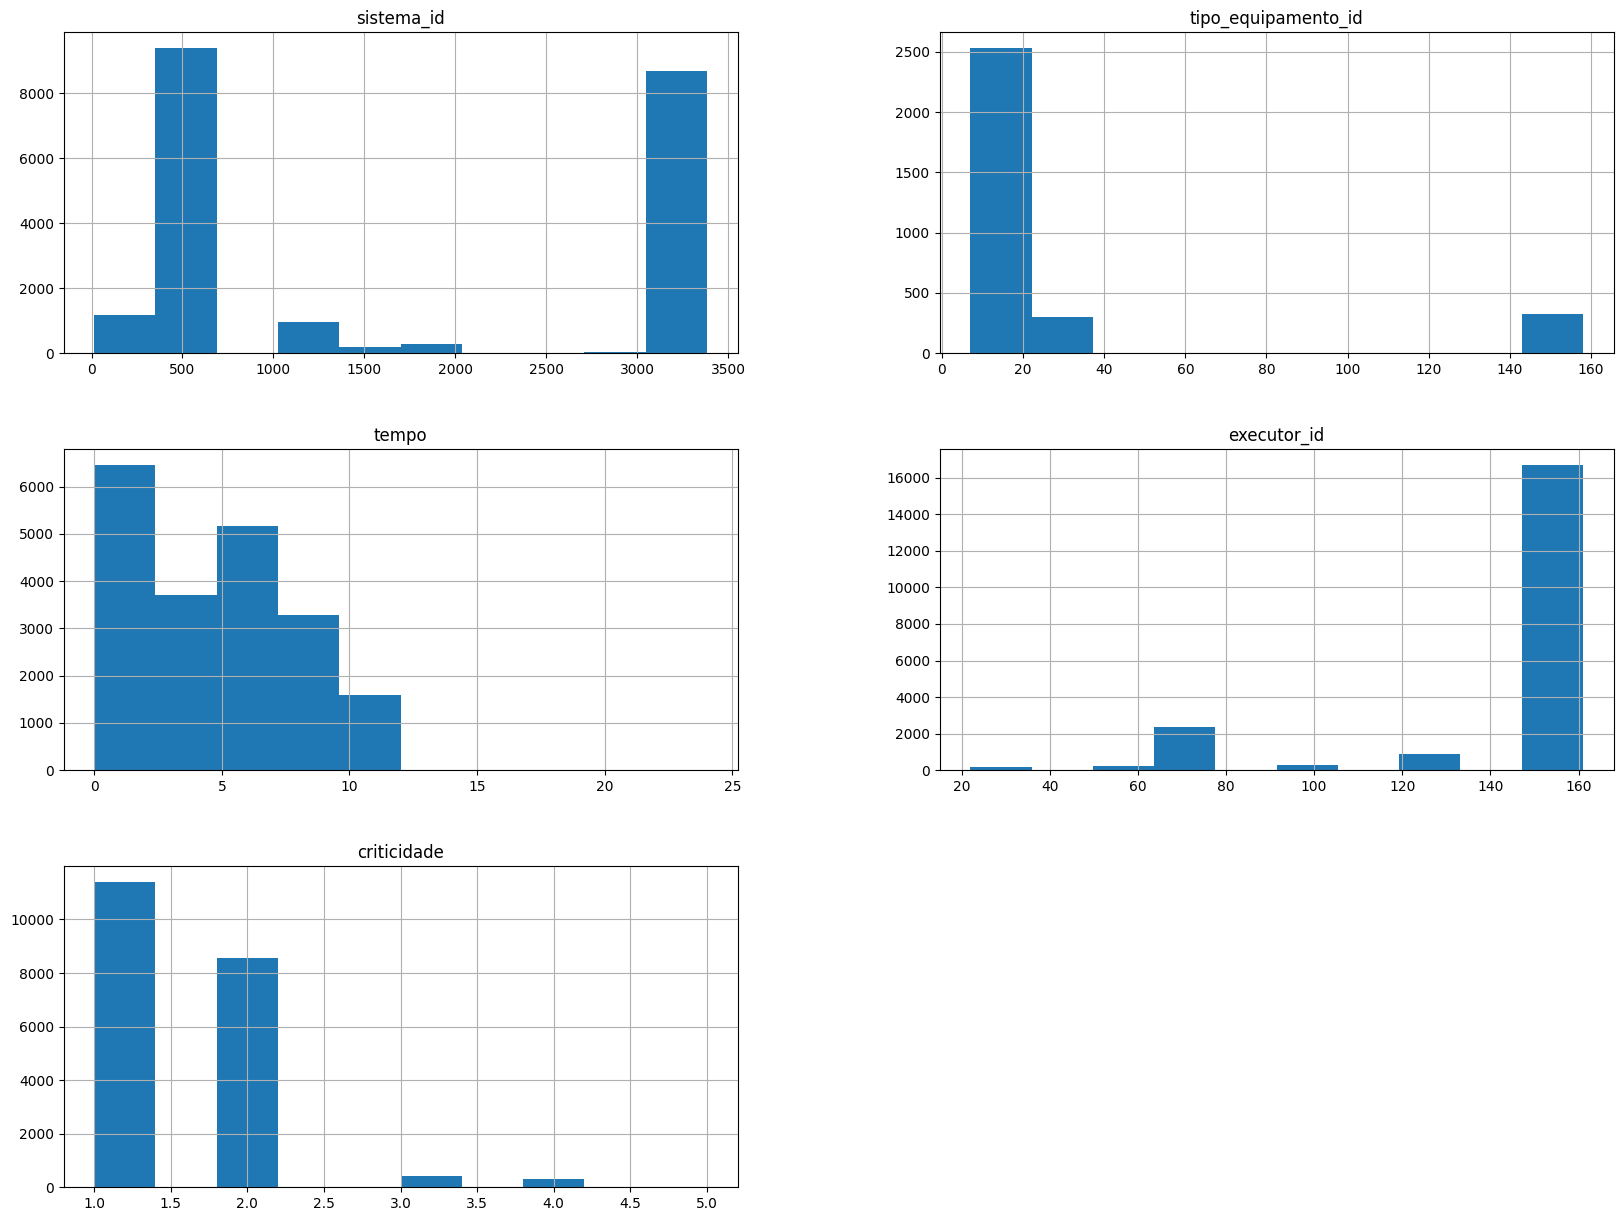

In [13]:
# Histograma
ds_inicial.hist(bins=10, figsize=(20,15))
plt.show()

O Density Plot, ou Gráfico de Densidade, apresenta semelhanças com o histograma, porém com uma visualização distinta. Utilizando-o, torna-se mais simples identificar a distribuição dos atributos do dataset. Seguindo a mesma abordagem utilizada com o histograma, será criado um density plot para cada atributo do dataset.


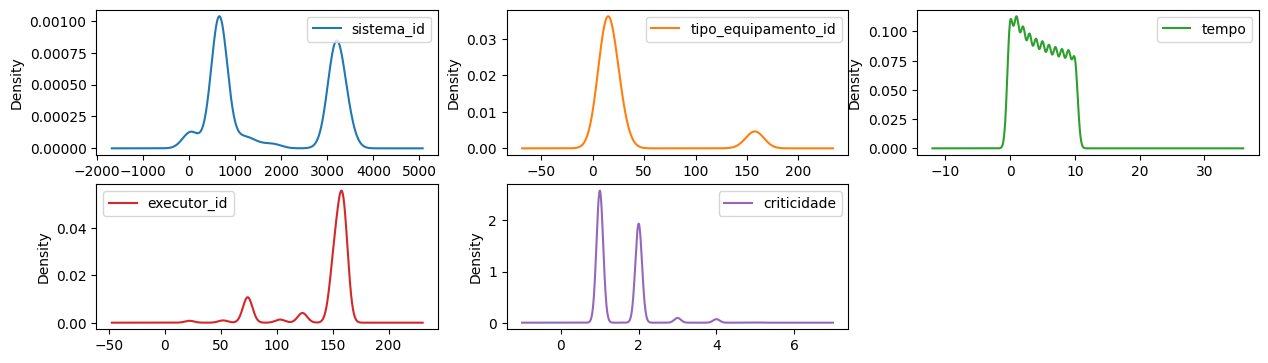

In [14]:
# Density Plot
ds_inicial.plot(kind = 'density', subplots = True, layout = (9,3), sharex = False, figsize = (15,20))

plt.show()


Observamos que os atributos sistema_id, tipo_equipamento_id e executor_id yem intervalos da ordem >= 10² e portanto teoricamente necessitariam de normalização. Não faremos a normalização pois sabemos que esses atributos não tem relevânia para as análises.

Nos gráficos bloxplot, veremos que a dispersão dos atributos do dataset é bem diferente. Observamos também que com excessão do atributo sistema_id, todos os demais tem pontos outlier.

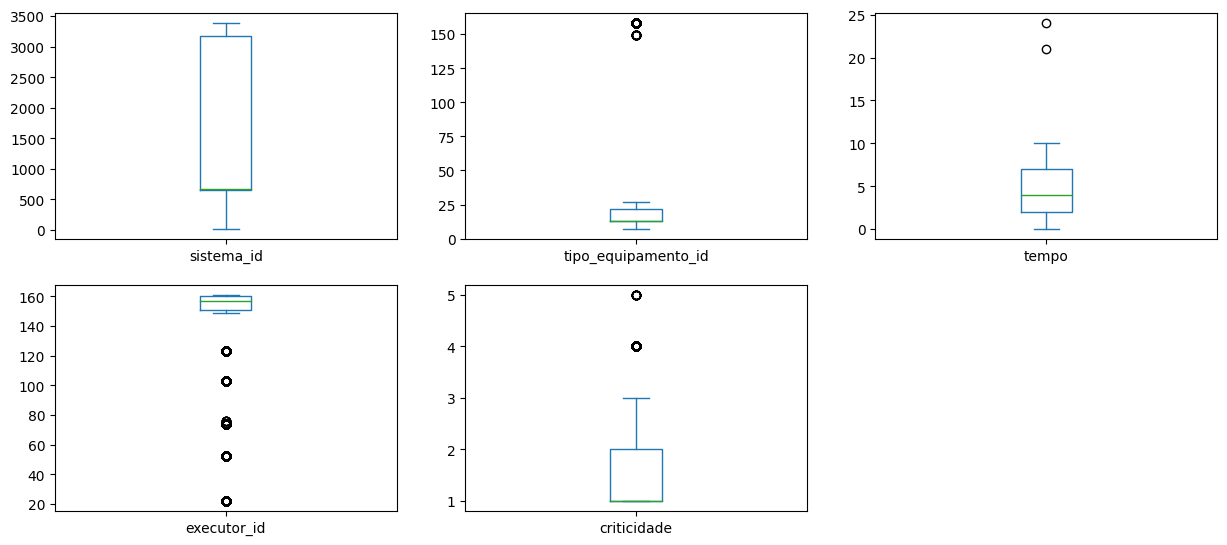

In [15]:
# Boxplot
ds_inicial.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

### 3.3. Visualizações Multimodais

Visualizaremos a seguir a **matriz de correlação** que exibe graficamente a correlação entre os atributos numéricos do dataset.

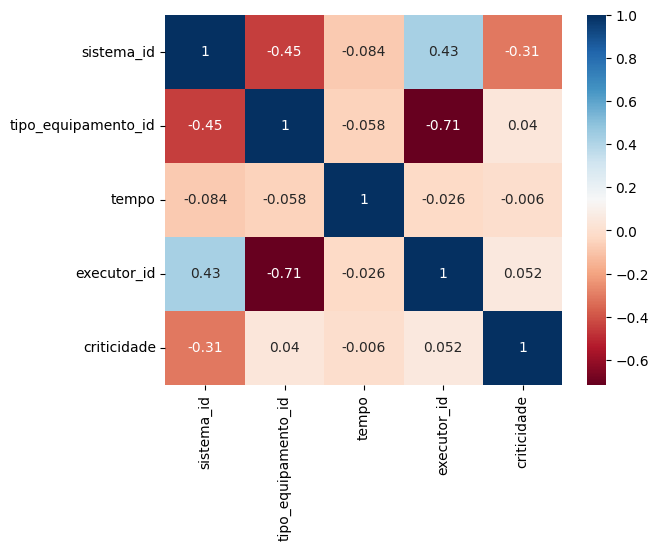

In [ ]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(ds_inicial.corr(), annot=True, cmap='RdBu');

Ao visualizar as correlações entre os atributos através da matriz de correlação, perceberemos haver covariância negativa mais significativa entre os atributos tipo_equipamento_id/sistema_id, executor_id/tipo de equipamento_id e positiva entre os atributos sistema_id/executor_id. <i>OBS: A relevância dessa informação reside no fato de que algoritmos como regressão linear e regressão logística podem sofrer problemas de desempenho caso haja alta correlação entre os atributos.</i>

O Scatter Plot, também conhecido como gráfico de dispersão, é utilizado para mostrar a relação entre duas variáveis. Com o Seaborn, exibiremos um gráfico para cada par de atributos do dataset.

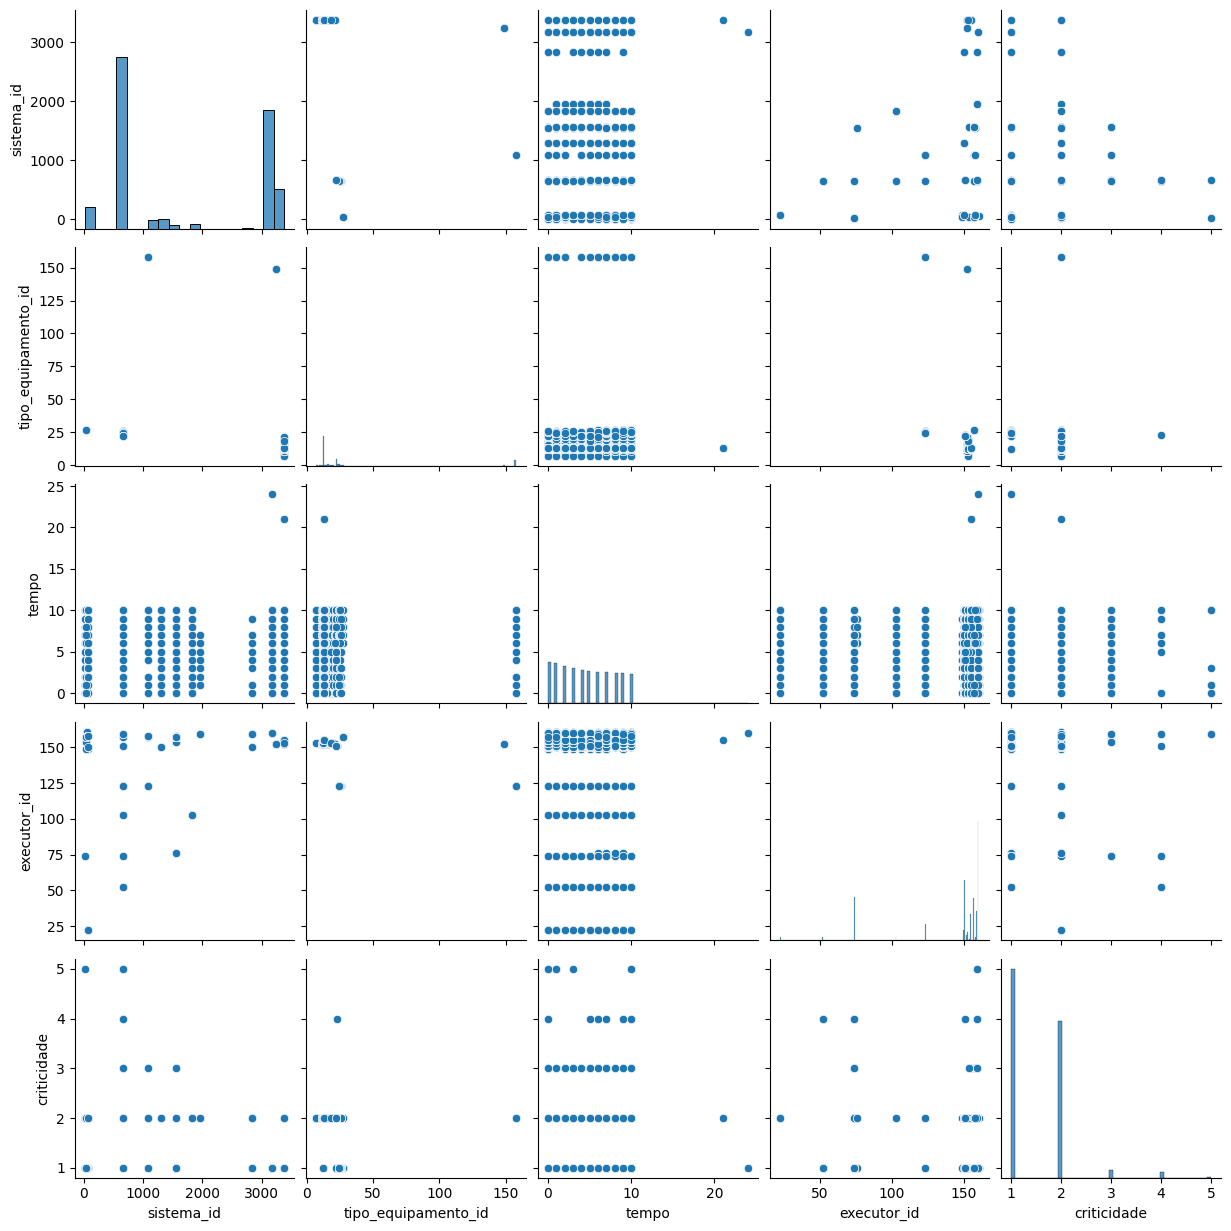

In [ ]:
# Scatter Plot com Seaborn

sns.pairplot(ds_inicial)

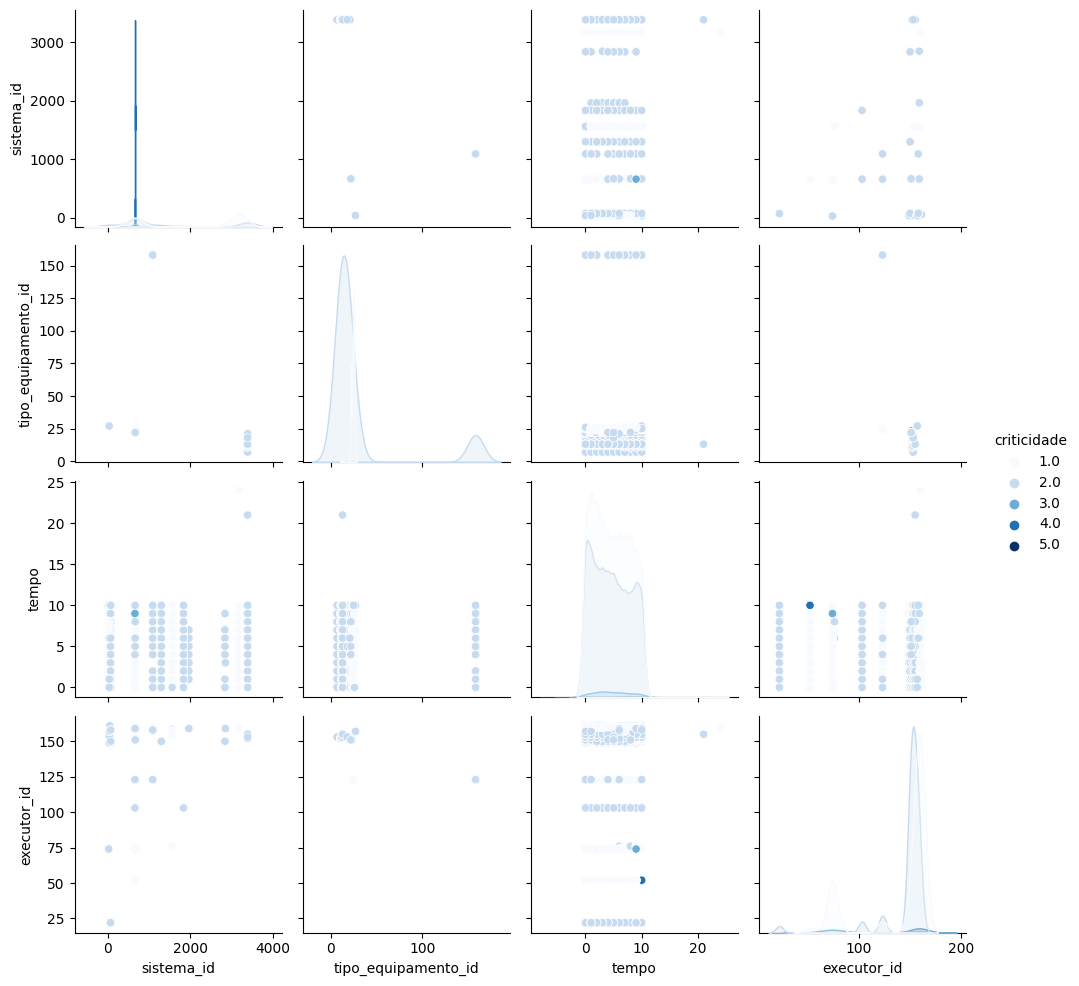

In [ ]:
# Scatter Plot com Seaborn - Com cores demonstrando o atributo criticidade

#sns.pairplot(ds_inicial, hue = "criticidade", height = 2.5);
sns.pairplot(ds_inicial, hue="criticidade", palette="Blues", height=2.5);

## 4. Pré-Processamento de dados

Nesta etapa, realizaremos diversas operações de preparação de dados para o tratamento de valores missings (faltantes) e limpeza de dados.

### 4.1. Tratamento de Missings e Limpeza

No dataset ds_inicial existem colunas que tem missings mas nesses casos tratam-se de linhas onde as atividades não foram realizadas. Vamos criar o novo atributo "executada" do tipo boolean para indicar se a atividade foi executada e em seguida preencher as datas de execução faltantes com a data de previsão da execução e também o tempo de execução com a média dos tempos.

In [16]:
# verificando nulls no dataset
ds_inicial.isnull().sum()

sistema_id                 0
sistema                    0
tipo_equipamento_id    17547
tipo_equipamento       17547
dt_prevista                0
dt_realizada             490
tempo                    490
executor_id               75
executor                  75
criticidade               23
tipo                       0
dtype: int64

In [17]:
# Criando o novo atributo executada do tipo boolean para indicar se a atividade foi executada
ds_inicial['executada'] = ds_inicial['dt_prevista'].notnull()

<Axes: >

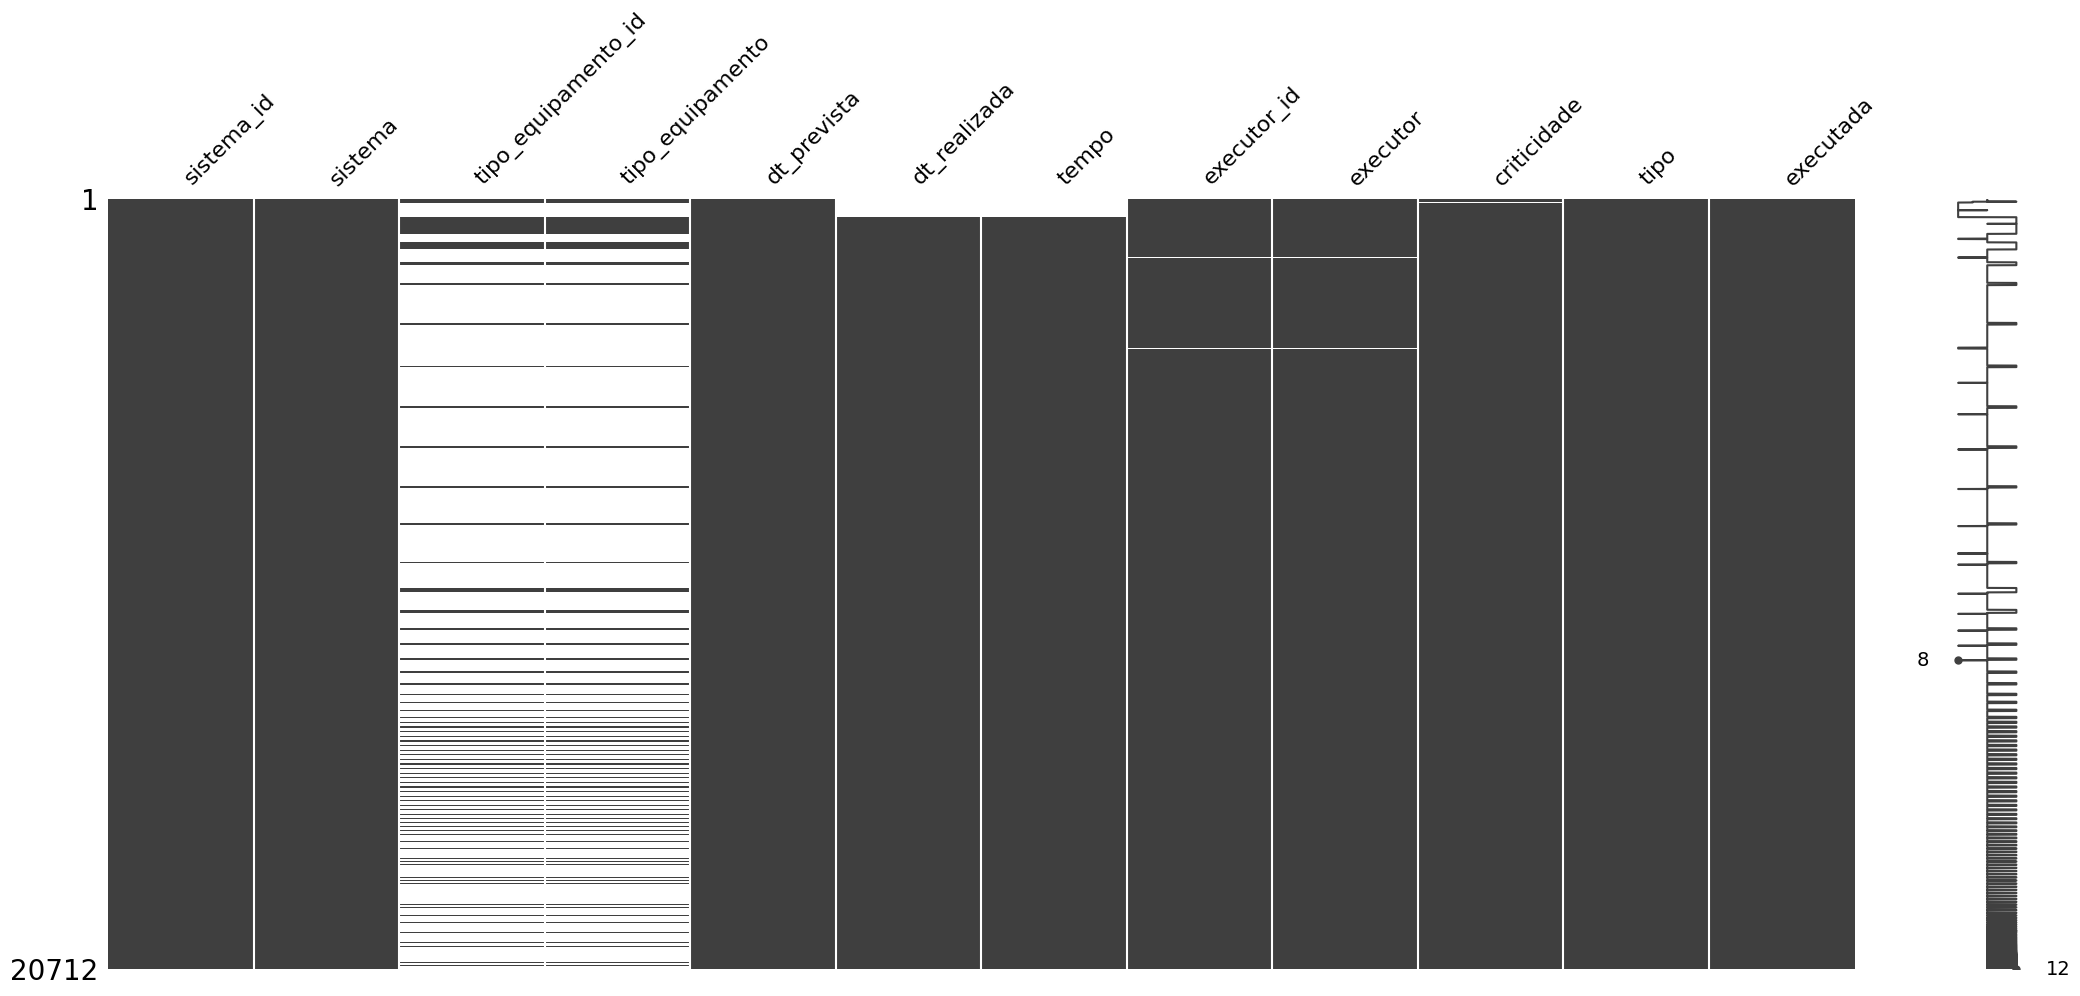

In [18]:
# vamos visualizar a matricial da nulidade do dataset
ms.matrix(ds_inicial)

<Axes: >

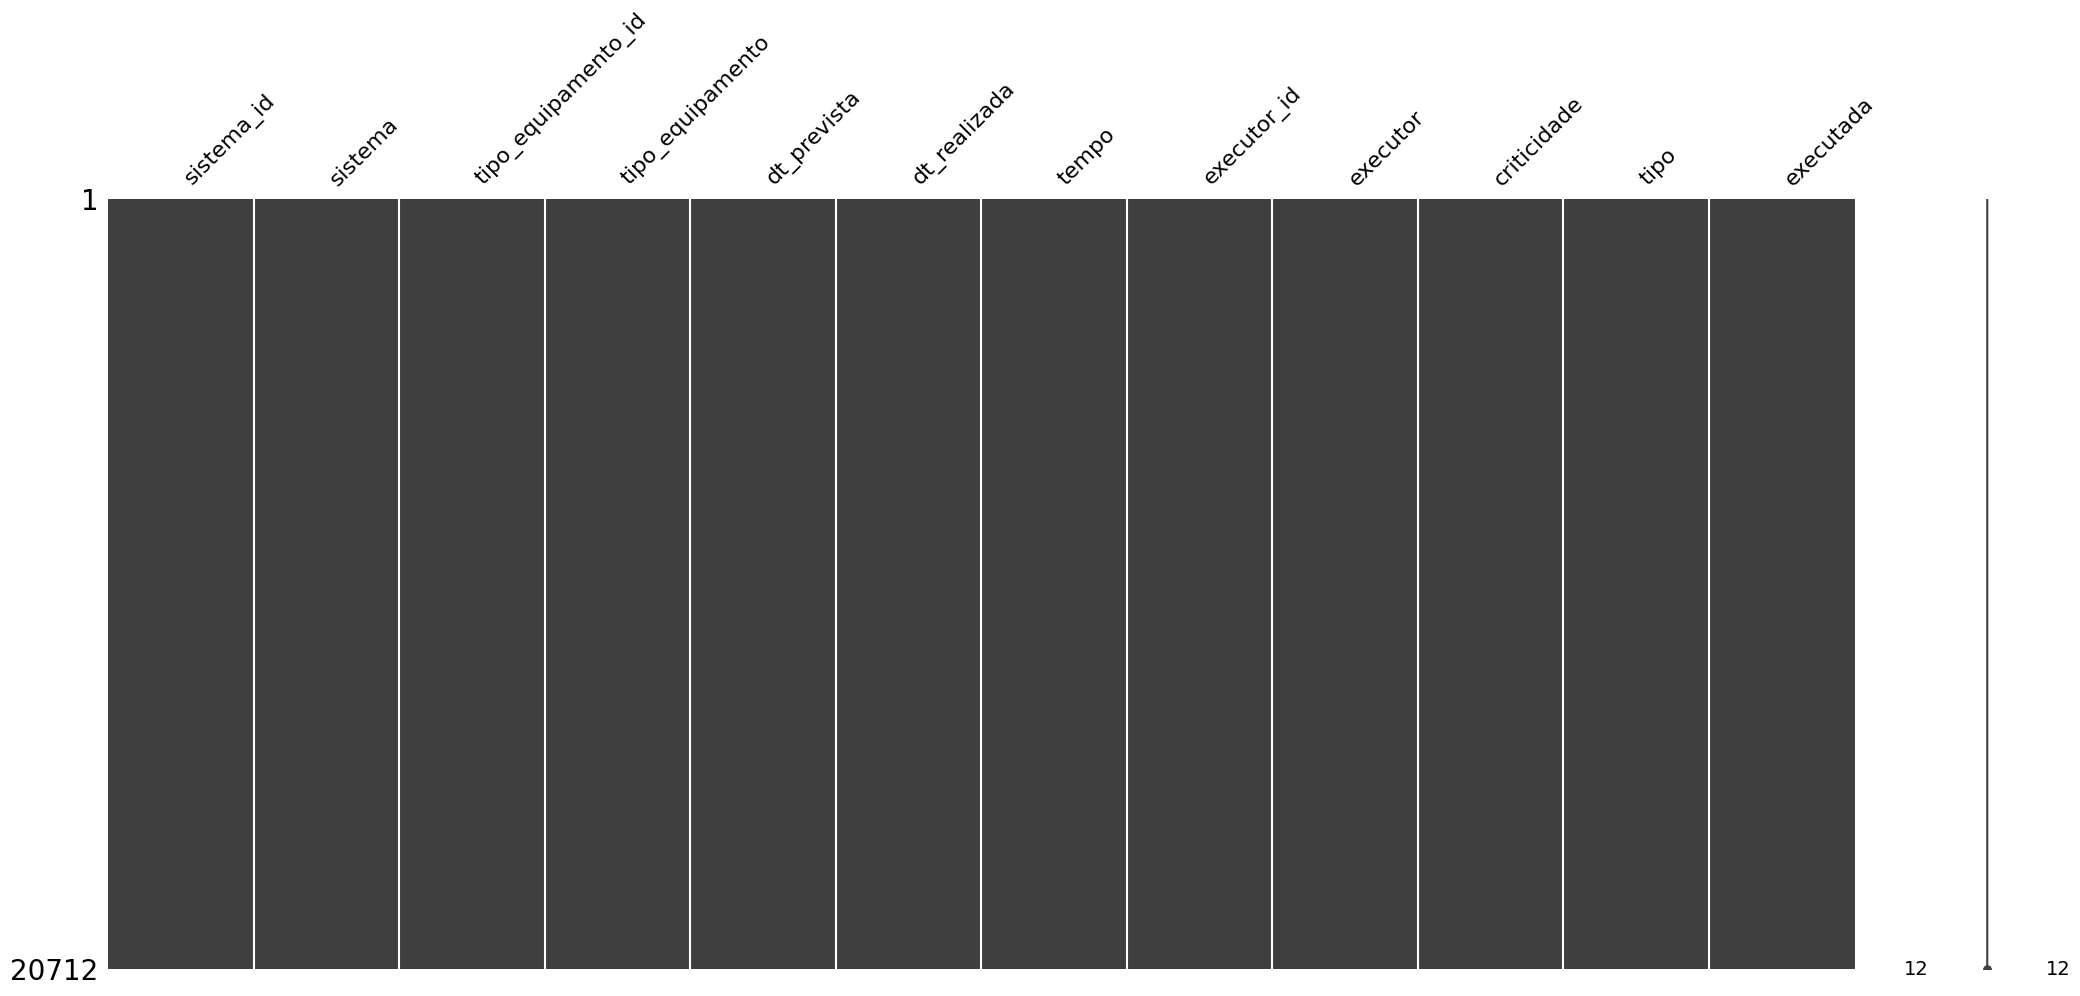

In [19]:
# vamos criar um NOVO dataset para tratamento de missings
ds_final = ds_inicial

# vamos atribuir o valor da mediana do atributo criticidade para as linhas em que este atributo está sem valor
mediana_criticidade = ds_final['criticidade'].median()
ds_final.loc[ds_final['criticidade'].isnull(), 'criticidade'] = mediana_criticidade

# vamos atribuir o valor 0 para aos atributos executor_id e tipo_equipamento_id para as linhas onde esses atributos estão sem valor
ds_final.loc[ds_final['executor_id'].isnull(), 'executor_id'] = 0
ds_final.loc[ds_final['tipo_equipamento_id'].isnull(), 'tipo_equipamento_id'] = 0

# vamos atribuir o valor 'NÃO REALIZADA' para ao atributo executor para as linhas que estão sem valor
ds_final.loc[ds_final['executor'].isnull(), 'executor'] = 'NÃO REALIZADA'

# vamos atribuir o valor '01/01/1900' para ao atributo executor_id para as linhas que estão sem valor
ds_final.loc[ds_final['dt_realizada'].isnull(), 'dt_realizada'] = '1900-01-01'

# vamos atribuir o valor da média do atributo tempo para as linhas que este atributo está sem valor
media_tempo = ds_final['tempo'].mean()
ds_final.loc[ds_final['tempo'].isnull(), 'tempo'] = media_tempo

# vamos atribuir o valor 'SISTEMA' para ao atributo tipo_equipamento para as linhas onde esse atributo está sem valor
ds_final.loc[ds_final['tipo_equipamento'].isnull(), 'tipo_equipamento'] = 'SISTEMA'

# vamos visualizar a matricial da nulidade do dataset
ms.matrix(ds_inicial)



### 4.2. Separação em conjunto de treino e conjunto de teste

Utilizaremos a estratégia train-test-split, separando 20% dos dados em um conjunto de teste (também chamado de conjunto de validação) e os 80% restantes em um conjunto de treino que será usada para a construção do modelo. O conjunto de testes  só será usado ao final, para confirmar a precisão do modelo final.
Primeiramente, iremos sinalizar quais são as colunas de atributos (X - 0 a 10) e qual é a coluna das classes (Y - 11). Em seguida, especificaremos o tamanho do conjunto de teste desejado e uma semente (para garantir a reprodutibilidade dos resultados). Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.


In [20]:
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset original)
array = ds_inicial.values
X = array[:,0:11]
y = array[:,11]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação

In [21]:
# Separação em conjuntos de treino e teste do dataset sem missings
array = ds_final.values
X_sm = array[:,0:10]
y_sm = array[:,11]
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
#X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=test_size, shuffle=True, random_state=seed, stratify=y_sm) # com estratificação